#Sonja's run of the data through models

#1. unsupervised learning - clusters using K means



In [1]:
# importing initial libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

In [2]:
#storing source data to keep synced with any changes
datafile = "./1_numeric_outliers_removed_transformed.csv"

In [3]:
# read in CSV file to use for DataFrame
denver_df = pd.read_csv(datafile)

# Add a 'city' column
#denver_df['city'] = 'Denver'

# Check dataframe
denver_df.head()

,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other
0,360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
denver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          3565 non-null   int64  
 1   num__accommodates                           3565 non-null   float64
 2   num__bedrooms                               3565 non-null   float64
 3   num__beds                                   3565 non-null   float64
 4   num__price                                  3565 non-null   float64
 5   num__availability_30                        3565 non-null   float64
 6   num__availability_60                        3565 non-null   float64
 7   num__availability_90                        3565 non-null   float64
 8   num__availability_365                       3565 non-null   float64
 9   num__number_of_reviews                      3565 non-null   float64
 10  num__number_

<Axes: xlabel='num__price', ylabel='num__review_scores_rating'>

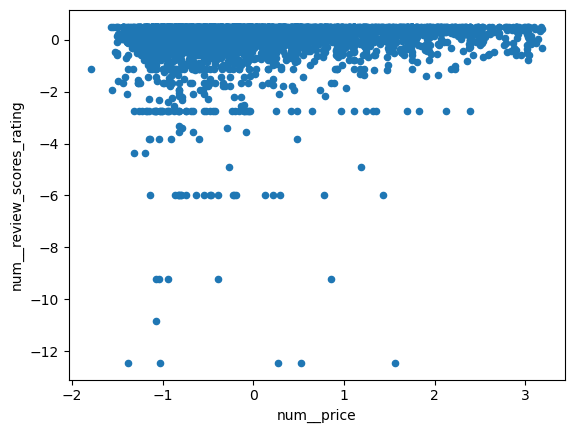

In [7]:
#visualize a scatter plot of data comparing price to  review_scores_rating
denver_df.plot.scatter(x= "num__price",
                       y="num__review_scores_rating")

In [8]:
#Run K-means model
model = KMeans(n_clusters=5, n_init="auto", random_state=1)
#print model
model

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [9]:
#fit the data to the model
model.fit(denver_df)


KMeans(n_clusters=5, n_init='auto', random_state=1)

In [10]:
#make predictions
prediction = model.predict(denver_df)

#print predictions
print(prediction)

[0 0 0 ... 3 3 3]


In [11]:
#copy of dataframe
denver_df_predictions = denver_df.copy()
#add a column to df to contain prediction  
denver_df_predictions["prediction"] = prediction
#review dataframe
denver_df_predictions.head()

,id,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,...,bool__has_availability_t,bool__instant_bookable_t,bool__prop_type_reduced_Entire condo,bool__prop_type_reduced_Entire guest suite,bool__prop_type_reduced_Entire guesthouse,bool__prop_type_reduced_Entire home,bool__prop_type_reduced_Entire rental unit,bool__prop_type_reduced_Entire townhouse,bool__prop_type_reduced_Other,prediction
0,360,-0.562715,0.152657,-0.192967,-0.931810,-0.551344,0.120505,0.449145,-0.210263,1.146599,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,364,-0.562715,-0.885936,-0.935868,0.207151,1.504547,1.454513,1.306215,1.467521,0.229000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,31503,-0.997213,-0.885936,-0.935868,-0.765445,0.314295,0.890125,0.943609,1.380054,0.947121,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,39405,-0.997213,-0.885936,-0.935868,-0.343133,-0.334934,-0.905654,-0.374960,-0.472665,6.013866,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,154999,-0.997213,-0.885936,-0.935868,-0.010403,-0.984163,-1.264810,-1.429815,-0.273876,-0.529017,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [12]:
#write to csv, to determine the grouping definition
denver_df_predictions.to_csv("test.csv",index=False)

<Axes: xlabel='num__price', ylabel='num__review_scores_rating'>

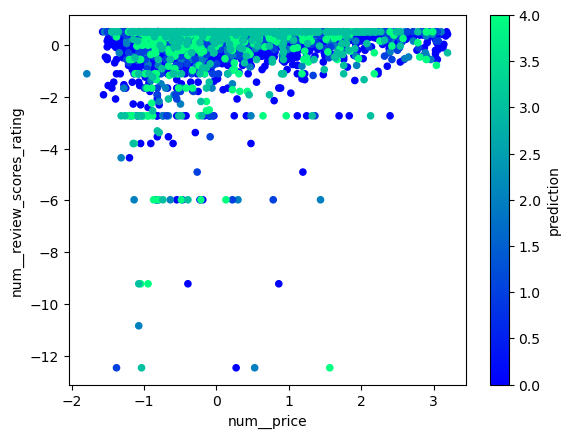

In [13]:
#plot the data points based on prediction
denver_df_predictions.plot.scatter(
    x= "num__price",
    y= "num__review_scores_rating",
    c= "prediction",
    colormap = "winter")


In [ ]:
####### play around with clustering values and x and y

In [ ]:
### reducing dimensionality using PCA with denver_df


Starting the classification code: going to run k-means and PCA but should I run others?  Will update this box as I decide.

In [ ]:
# Calculate the PCA explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display or use explained_variance_ratio as needed
print(explained_variance_ratio)

In [ ]:
# summing the explained variance 
explained_denver = explained_variance_ratio.sum()

# Display 
print(explained_denver)

So with 26 different components we can explain 99.9999% of the variance but now to reduce to something manageable  

In [ ]:
# just looking at the data to make certain I have it all
df_pca_result.tail()

In [ ]:
# Create the denver PCA DataFrame as a seperate view
denver_pca_df = pd.DataFrame(
    df_pca_result,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
             "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24",
             "PC25", "PC26"])

# Review the PCA DataFrame
denver_pca_df.tail()

In [ ]:
# darn null values just don't work with unsupervised learning deleting them
denver_pca_no_null = df_pca_result.dropna()


In [ ]:
# Check for missing values 
missing_values = denver_pca_no_null.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

In [ ]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 26))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(denver_pca_no_null)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(26)

In [ ]:
 # Plotting my inertia and k
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [ ]:
# Define the model Kmeans model... which sucks because it could be 10 or 14
model = KMeans(n_clusters=10, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictions
k_10 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_10 = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df_10["customer_segments"] = k_10

In [ ]:
# Plot the clusters
denver_pca_predictions_df_10.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

In [ ]:
# Define the model Kmeans model... hold to try more
model = KMeans(n_clusters=7, n_init='auto', random_state=0)

# Fit the model
model.fit(denver_pca_no_null)

# Make predictionsy others
k_7 = model.predict(denver_pca_no_null)

# Create a copy of the customers_pca_df DataFrame
denver_pca_predictions_df_7 = denver_pca_no_null.copy()

# Add a class column with the labels
denver_pca_predictions_df_7["customer_segments"] = k_7

In [ ]:
# hold to try more
denver_pca_predictions_df_7.plot.scatter(
    x="PC1",
    y="PC2",
    c="customer_segments",
    colormap='winter')

# note I don't like this one

In [ ]:
# Plot the clusters using price and if it is available 30 days out - I should probably work on this more 
denver_pca_predictions_df_10.plot.scatter(
    x="num__price",
    y="num__beds",
    c="customer_segments",
    colormap='winter')

In [ ]:
# looking at what weight more 
pca_component_weights = pd.DataFrame(pca.components_.T, columns=[
    "num__accommodates", "num__bedrooms", "num__beds", "num__price", "num__availability_30", "num__availability_60",
    "num__availability_90", "num__availability_365", "num__number_of_reviews", "num__number_of_reviews_ltm",
    "num__number_of_reviews_l30d", "num__review_scores_rating", "num__review_scores_accuracy",
    "num__review_scores_cleanliness", "num__review_scores_checkin", "num__review_scores_communication",
    "num__review_scores_location", "num__review_scores_value", "num__reviews_per_month",
    "bool__host_is_superhost_f", "bool__host_is_superhost_t", "bool__host_is_superhost_nan",
    "bool__host_has_profile_pic_t", "bool__host_identity_verified_t", "bool__has_availability_t",
    "bool__instant_bookable_t", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12",
    "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20", "PC21", "PC22", "PC23", "PC24", "PC25", "PC26"], index=denver_pca_no_null.columns)
pca_component_weights